In [2]:
# importing packages
import numpy as np
from sklearn import metrics
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from utilities import visualize_classifier
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
# loading the input data
input_file = 'data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')

# reading the data
X, Y = data[:, :-1], data[:, -1]

In [4]:
# separating the data into two separate classes based on their labels
class_0 = np.array(X[Y==0])
class_1 = np.array(X[Y==1])

Text(0.5,1,'Data plot')

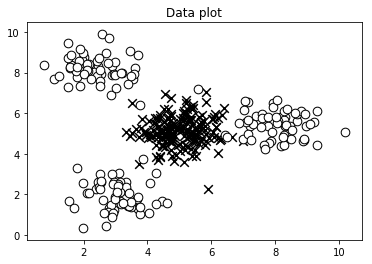

In [5]:
# visualizing the input data using a scatter plot
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black',
            edgecolors='black', linewidths=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white',
            edgecolors='black', linewidths=1, marker='o')
plt.title('Data plot')

In [6]:
# splitting the data into training and testing sets 
# the random state parameter refers to the seed used by the rand no generator
# required for the initilization of the tree classfication algorithm
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=5)
print(len(X_train), len(Y_train))
print(len(X_test), len(Y_test))
print(len(X), len(Y))

270 270
90 90
360 360


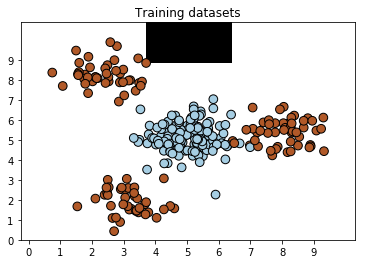

In [12]:
# creating the decision tree classifier model
# initializing the classifier paramater and creating the classifier objects
# max_depth refers to the maximum depth of the tree we want to construct
paramater = {'random_state':0, 'max_depth':4}
classifier = DecisionTreeClassifier(**paramater)

# training the classifier model with the training sets of the data
classifier.fit(X_train, Y_train)

# visualizing the training dataset using the visualize_classifier
# imported from utilities
visualize_classifier(classifier, X_train, Y_train, 'Training datasets')

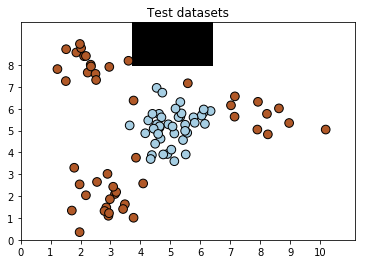

In [13]:
# computing the output of the classifier on the test dataset
Y_test_predict = classifier.predict(X_test)

# visualizing the test dataset
visualize_classifier(classifier, X_test, Y_test, 'Test datasets')

In [18]:
# evaluating the perfomance of the classifier
class_names = ['Class-0', 'Class-1']
print('\n' + '#'*50)
print('\nClassifier performance on training dataset\n')

# getting the classification report and printing it
report = metrics.classification_report(Y_train, classifier.predict(X_train),
                                      target_names=class_names)
print(report)

print('\n' + '#'*50)
print('\nClassifier performance on test dataset\n')
print(metrics.classification_report(Y_test, Y_test_predict, target_names=class_names))
print('#'*50 + '\n')


##################################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270


##################################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

##################################################



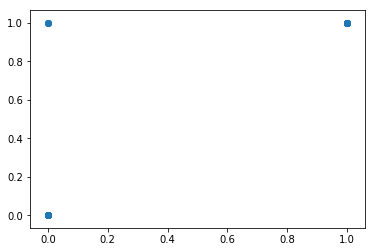

In [24]:
plt.scatter(Y_test_predict, Y_test)

In [28]:
Y_test_predict[5]

0.0

In [27]:
X_test[5]

array([5.33, 6.31])